In [1]:
import pandas as pd
import numpy as np
import ast
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data processing

### Cleaning of individual movie datasets (IMDb, IMDb_2020, TMDb, rotten tomatoes, The Ultimate 1Million Movies Dataset (TMDB + IMDb))

### IMDb data

In [ ]:
# Concatenate movies
action_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Action.csv')
adventure_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Adventure.csv')
animation_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Animation.csv')
biography_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Biography.csv')
comedy_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Comedy.csv')
crime_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Crime.csv')
drama_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Drama.csv')
fantasy_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Fantasy.csv')
history_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/History.csv')
horror_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Horror.csv')
music_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Music.csv')
mystery_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Mystery.csv')
romance_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Romance.csv')
scifi_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Sci-Fi.csv')
spIMDbmov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Sport.csv')
thriller_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/Thriller.csv')
war_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDb/1_movies_per_genre/War.csv')

# Concatenate all movie data
IMDbmov = pd.concat([
    action_mov, adventure_mov, animation_mov, biography_mov, comedy_mov, crime_mov,
    drama_mov, fantasy_mov, history_mov, horror_mov, music_mov, mystery_mov,
    romance_mov, scifi_mov, spIMDbmov, thriller_mov, war_mov
])

# Drop unnecessary columns
IMDbmov.drop(columns=['release_date', 'review_url'], inplace=True)

# Rename columns
IMDbmov.rename(columns={
    'name': 'movie_title',
    'year': 'movie_year_of_release',
    'rating': 'imdb_avg_movie_rating',
    'run_length': 'movie_duration',
    'genres': 'movie_genre',
    'num_reviews': 'imdb_num_movie_reviews',
    'num_raters': 'imdb_num_movie_ratings'
}, inplace=True)

# Function to convert "h min" format to total minutes
def convert_to_minutes(duration):
    if 'h' in duration and 'min' in duration:
        hours, minutes = duration.split('h')
        minutes = int(minutes.strip(' min'))  # Remove 'min' and convert to int
        return int(hours.strip()) * 60 + minutes
    elif 'h' in duration:  # Only hours are present
        return int(duration.strip('h')) * 60
    elif 'min' in duration:  # Only minutes are present
        return int(duration.strip('min'))
    else:
        return 0  # Invalid format

# Apply the function to the 'movie_duration' column
IMDbmov['movie_duration'] = IMDbmov['movie_duration'].apply(convert_to_minutes).astype('Int64')

# Convert and clean 'movie_year_of_release'
IMDbmov['movie_year_of_release'] = pd.to_numeric(IMDbmov['movie_year_of_release'], errors='coerce')
IMDbmov['movie_year_of_release'] = IMDbmov['movie_year_of_release'].round(0).astype('Int64')

# Standardize 'movie_title' column
IMDbmov['movie_title'] = IMDbmov['movie_title'].str.strip().str.lower()

# Standardize the genre strings
IMDbmov['movie_genre'] = IMDbmov['movie_genre'] \
    .str.replace(';', ',', regex=False) \
    .str.strip() \
    .str.rstrip(',')

# Drop unnecessary columns
IMDbmov.drop(columns=['imdb_avg_movie_rating', 'imdb_num_movie_ratings', 'imdb_num_movie_reviews'], inplace=True)

# Remove duplicates
IMDbmov = IMDbmov.drop_duplicates()

# Group by movie details and aggregate genres
IMDbmov = IMDbmov.groupby([
    'movie_title', 'movie_year_of_release', 'movie_rated', 'movie_duration'
], as_index=False).agg({
    'movie_genre': lambda x: ', '.join(sorted(set(genre.strip() for genre in x.dropna())))
})

# Function to standardize genres
def standardize_genres(genres):
    # Genre mapping
    mapping = {'sci-fi': ['Science Fiction']}

    # Split genres and apply mapping
    genre_list = [genre.strip() for genre in genres.split(',')]
    standardized = []

    for genre in genre_list:
        standardized.extend(mapping.get(genre.lower(), [genre]))

    return ', '.join(standardized)

# Apply genre standardization
IMDbmov['movie_genre'] = IMDbmov['movie_genre'].apply(standardize_genres)


In [ ]:
IMDbmov.head(3)

,movie_title,movie_year_of_release,movie_rated,movie_duration,movie_genre
0,10 cloverfield lane,2016,PG-13,103,"Drama, Horror, Mystery"
1,10 things i hate about you,1999,PG-13,97,"Comedy, Romance"
2,12 angry men,1957,Approved,96,"Crime, Drama"


### TMDb data

In [ ]:
TMDb_7 = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/TMDb/TMDB_7000_Top_Rated_Movies.csv')
TMDb_10 = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/TMDb/TMDB_10000_Popular_Movies.csv')
TMDb = pd.concat([TMDb_10, TMDb_7]).drop_duplicates(subset='TMDb_Id')
TMDb.drop(columns=['Original_Title', 'TMDb_Id', 'Original_Language', 'Languages_Spoken'], inplace=True)
TMDb.rename(columns={'Title':'movie_title', 'Overview':'movie_description', 'Genres':'movie_genre',
                     'Cast':'movie_cast', 'Runtime':'movie_duration', 'Country_of_Origin':'movie_country_of_origin',
                     'Revenue':'movie_revenue', 'Budget':'movie_budget', 'Rating_average':'tmdb_avg_movie_rating',
                     'Release_Date':'movie_year_of_release', 'IMDb_Id':'imdb_title_id',
                     'Rating_Count':'tmdb_num_movie_ratings', 'Crew':'movie_crew', 'Collection':'movie_collection',
                     'Release_Status':'release_status','Production_Companies':'production_companies',
                     'Tagline':'movie_tagline', 'Popularity':'movie_popularity'}, inplace=True)

# Convert the 'release_date' column to datetime format
TMDb['movie_year_of_release'] = pd.to_datetime(TMDb['movie_year_of_release'])

# Extract only the year
TMDb['movie_year_of_release'] = TMDb['movie_year_of_release'].dt.year
TMDb['movie_year_of_release'] = pd.to_numeric(TMDb['movie_year_of_release'], errors='coerce')
TMDb['movie_year_of_release'] = TMDb['movie_year_of_release'].round(0).astype('Int64')

TMDb['movie_duration'] = TMDb['movie_duration'].astype('Int64')

TMDb['movie_title'] = TMDb['movie_title'].str.strip().str.lower()

#List of columns with strings to standardize
stan = ['movie_genre', 'movie_cast', 'movie_crew', 'production_companies', 'movie_country_of_origin' ]

# Standardize the col strings in TMDb
for col in stan:
    TMDb[col] = (
        TMDb[col]
        .str.replace('|', ',', regex=False)  # Ensure pipe is consistent
        .str.strip()  # Remove any trailing spaces
        .str.replace(r'\s*,\s*', ',', regex=True) # Remove spaces before and after commas
        .str.rstrip(',')  # Remove any trailing comma
    )

    # Define the function to standardize genres
def standardize_genres(genres):
    # Create a mapping for genres
    mapping = {
        'sci-fi': ['Science Fiction']
    }

     #Handle float or NaN values in genres
    if isinstance(genres, float) or pd.isna(genres):
        return ''  # Return empty string if genres is not a string

    # Split the genres by comma and strip whitespace
    genre_list = [genre.strip() for genre in genres.split(',')]
    standardized = []

    for genre in genre_list:
        # Check if the genre is in the mapping and extend the list accordingly
        if genre.lower() in mapping:
            standardized.extend(mapping[genre.lower()])
        else:
            standardized.append(genre)

    # Join the standardized genres back into a single string
    return ', '.join(standardized)

# Apply the function to the movie_genre column
TMDb['movie_genre'] =TMDb['movie_genre'].apply(standardize_genres)

TMDb['movie_budget'] = TMDb['movie_budget'].replace(0, np.nan)
TMDb['movie_revenue'] = TMDb['movie_revenue'].replace(0, np.nan)

TMDb.drop(columns=['tmdb_avg_movie_rating', 'tmdb_num_movie_ratings', 'movie_budget', 'movie_tagline'], inplace=True)

TMDb = TMDb.drop_duplicates()


In [ ]:
TMDb.head(3)

,imdb_title_id,movie_title,movie_description,movie_genre,movie_cast,movie_crew,movie_collection,movie_year_of_release,release_status,movie_duration,movie_popularity,production_companies,movie_country_of_origin,movie_revenue
0,tt2935510,ad astra,"The near future, a time when both hope and har...","Drama, Science Fiction","Brad Pitt,Tommy Lee Jones,Ruth Negga,John Orti...","Brad Pitt,Arnon Milchan,Gary Rydstrom,Gary Ryd...",Single,2019,Released,123,463.487,"New Regency Productions,Keep Your Head,MadRive...","Brazil,China,United States of America",127175922.0
1,tt1634106,bloodshot,"After he and his wife are murdered, marine Ray...","Action, Science Fiction","Vin Diesel,Eiza González,Sam Heughan,Toby Kebb...","John Papsidera,Matthew Vaughn,Jim May,Neal H. ...",Single,2020,Released,110,235.701,"Sony Pictures,Cross Creek Pictures,Mimran Schu...","China,United States of America",24573617.0
2,tt1502397,bad boys for life,Marcus and Mike are forced to confront new thr...,"Action, Crime, Thriller","Will Smith,Martin Lawrence,Paola Nuñez,Vanessa...","Jerry Bruckheimer,Mike Stenson,Chad Oman,Jon B...",Bad Boys Collection,2020,Released,124,255.068,"Columbia Pictures,Platinum Dunes,2.0 Entertain...","France,United States of America",191150000.0


### Rotten Tomatoes data

In [ ]:
rt_mov = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/RottenTomatoes/rotten_tomatoes_movies.csv')
rt_mov.drop(columns=['id', 'tomatoMeter', 'ratingContents', 'releaseDateStreaming', 'distributor', 'soundMix', 'audienceScore'], inplace=True)
rt_mov.rename(columns={'title':'movie_title', 'rating':'movie_rated',
                       'releaseDateTheaters':'movie_year_of_release', 'runtimeMinutes':'movie_duration', 'genre':'movie_genre',
                       'originalLanguage':'movie_language', 'director':'movie_director', 'writer':'movie_writer',
                       'boxOffice':'movie_revenue'}, inplace=True)

rt_mov['movie_title'] = rt_mov['movie_title'].str.strip().str.lower()

rt_mov['movie_duration'] = rt_mov['movie_duration'].astype('Int64')

# Convert the 'release_date' column to datetime format
rt_mov['movie_year_of_release'] = pd.to_datetime(rt_mov['movie_year_of_release'])

# Extract only the year
rt_mov['movie_year_of_release'] = rt_mov['movie_year_of_release'].dt.year
rt_mov['movie_year_of_release'] = pd.to_numeric(rt_mov['movie_year_of_release'], errors='coerce')
rt_mov['movie_year_of_release'] = rt_mov['movie_year_of_release'].round(0).astype('Int64')

# Group by title, year, and other identifying fields, then aggregate genres and other columns
rt_mov = (
    rt_mov.groupby(['movie_title', 'movie_year_of_release', 'movie_rated', 'movie_duration', 'movie_language',
                    'movie_director', 'movie_writer', 'movie_revenue'], as_index=False)
    .agg({
        'movie_genre': lambda x: ', '.join(sorted(set(genre.strip() for genre in x.dropna())))
    })
)

# Define the function to standardize genres
def standardize_genres(genres):
    # Create a mapping for genres
    mapping = {
        'mystery & thriller': ['Mystery','Thriller'],
        'sci-fi': ['Science Fiction'],
        'kids & family': ['Family','Kids']
    }

    # Split the genres by comma and strip whitespace
    genre_list = [genre.strip() for genre in genres.split(',')]
    standardized = []

    for genre in genre_list:
        # Check if the genre is in the mapping and extend the list accordingly
        if genre.lower() in mapping:
            standardized.extend(mapping[genre.lower()])
        else:
            standardized.append(genre)

    # Join the standardized genres back into a single string
    return ', '.join(standardized)

# Apply the function to the movie_genre column

rt_mov['movie_genre'] = rt_mov['movie_genre'].apply(standardize_genres)

# Function to convert movie revenue to float
def convert_revenue_to_float(revenue):
    if pd.isna(revenue):  # If revenue is NaN
        return np.nan
    revenue = revenue.replace('$', '')  # Remove the dollar sign
    if 'M' in revenue:
        return float(revenue.replace('M', '')) * 1e6  # Convert from millions
    elif 'K' in revenue:
        return float(revenue.replace('K', '')) * 1e3  # Convert from thousands
    else:
        return float(revenue)  # No suffix, treat as regular number

# Apply the function to the 'movie_revenue' column
rt_mov['movie_revenue'] = rt_mov['movie_revenue'].apply(convert_revenue_to_float)

# Drop rows with any NaN values
rt_mov= rt_mov.dropna(how='any')

rt_mov = rt_mov.drop_duplicates()

In [ ]:
rt_mov.head(3)

,movie_title,movie_year_of_release,movie_rated,movie_duration,movie_language,movie_director,movie_writer,movie_revenue,movie_genre
0,$9.99,2008,R,78,English,Tatia Rosenthal,"Etgar Keret,Tatia Rosenthal",52100.0,"Fantasy, Drama, Animation"
1,'71,2015,R,99,English,Yann Demange,Gregory Burke,1300000.0,"Action, Mystery, Thriller"
2,'til death do us part,2017,PG-13,100,English,Chris Stokes,"Chris Stokes,Marques Houston",3500000.0,"Mystery, Thriller"


### IMDb_2020 data

In [ ]:
IMDb_2020 = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/IMDB_Movies_2000_2020_CLEAN.csv')

# Convert the 'release_date' column to datetime format
IMDb_2020['movie_year_of_release'] = pd.to_datetime(IMDb_2020['movie_year_of_release'])
# Extract only the year
IMDb_2020['movie_year_of_release'] = IMDb_2020['movie_year_of_release'].dt.year
IMDb_2020['movie_year_of_release'] = pd.to_numeric(IMDb_2020['movie_year_of_release'], errors='coerce')
IMDb_2020['movie_year_of_release'] = IMDb_2020['movie_year_of_release'].round(0).astype('Int64')

IMDb_2020['movie_title'] = IMDb_2020['movie_title'].str.strip().str.lower()

IMDb_2020['movie_budget'] = pd.to_numeric(IMDb_2020['movie_budget'], errors='coerce').astype(float)
IMDb_2020['movie_revenue'] = pd.to_numeric(IMDb_2020['movie_revenue'], errors='coerce').astype(float)

IMDb_2020['movie_duration'] = IMDb_2020['movie_duration'].astype('Int64')

stan = ['movie_cast', 'movie_country_of_origin', 'movie_genre', 'movie_language']

for col in stan:

    # Standardize the col strings in IMDb
    IMDb_2020[col] = (
        IMDb_2020[col]
        .str.strip()  # Remove any trailing spaces
    )

IMDb_2020.rename(columns={'num_movie_reviews':'imdb_num_movie_reviews', 'avg_movie_rating':'imdb_avg_movie_rating'}, inplace=True)

IMDb_2020['imdb_avg_movie_rating'] = IMDb_2020['imdb_avg_movie_rating'].astype('float')

IMDb_2020.drop(columns=['movie_budget', 'imdb_avg_movie_rating', 'imdb_num_movie_reviews'], inplace=True)

# Replace 'UK' and 'USA' with their full names even if they appear as substrings in a specific column
IMDb_2020['movie_country_of_origin'] = IMDb_2020['movie_country_of_origin'].str.replace(
    r'\bUK\b', 'United Kingdom', regex=True
).str.replace(
    r'\bUSA\b', 'United States of America', regex=True
)

# Define the function to standardize genres
def standardize_genres(genres):
    # Create a mapping for genres
    mapping = {
        'sci-fi': ['Science Fiction']
    }

    # Split the genres by comma and strip whitespace
    genre_list = [genre.strip() for genre in genres.split(',')]
    standardized = []

    for genre in genre_list:
        # Check if the genre is in the mapping and extend the list accordingly
        if genre.lower() in mapping:
            standardized.extend(mapping[genre.lower()])
        else:
            standardized.append(genre)

    # Join the standardized genres back into a single string
    return ', '.join(standardized)

# Apply the function to the movie_genre column
IMDb_2020['movie_genre'] =IMDb_2020['movie_genre'].apply(standardize_genres)

IMDb_2020 = IMDb_2020.drop_duplicates()

In [ ]:
IMDb_2020.head(3)

,imdb_title_id,movie_title,movie_year_of_release,movie_genre,movie_duration,movie_country_of_origin,movie_director,movie_writer,movie_cast,movie_description,movie_revenue,movie_language
0,tt0035423,kate & leopold,2001,"Comedy, Fantasy, Romance",118,United States of America,James Mangold,"Steven Rogers, James Mangold","Meg Ryan, Hugh Jackman, Liev Schreiber, Brecki...",An English Duke from 1876 is inadvertedly drag...,76019048.0,"English, French"
1,tt0118589,glitter,2001,"Drama, Music, Romance",104,United States of America,Vondie Curtis-Hall,"Cheryl L. West, Kate Lanier","Mariah Carey, Max Beesley, Da Brat, Tia Texada...",A young singer dates a disc jockey who helps h...,5271666.0,English
2,tt0118694,fa yeung nin wah,2000,"Drama, Romance",98,"Hong Kong, China",Kar-Wai Wong,Kar-Wai Wong,"Maggie Cheung, Tony Chiu-Wai Leung, Ping Lam S...","Two neighbors, a woman and a man, form a stron...",12854953.0,"Cantonese, Shanghainese, French"


### The Ultimate 1Million Movies Dataset (TMDB + IMDb)

In [ ]:
TMDb_2 = pd.read_csv('/content/drive/My Drive/BT4222/BT4222_datasets/TMDB_all_movies.csv')
TMDb_2.drop(columns=['id', 'vote_average','vote_count', 'status', 'budget', 'original_language', 'original_title', 'tagline', 'director_of_photography',
                     'director_of_photography', 'producers', 'music_composer', 'imdb_rating', 'imdb_votes', 'poster_path'], inplace=True)
TMDb_2.rename(columns={'title':'movie_title', 'release_date':'movie_year_of_release', 'revenue':'movie_revenue', 'runtime':'movie_duration',
                       'imdb_id':'imdb_title_id', 'overview':'movie_description', 'popularity':'movie_popularity', 'genres':'movie_genre',
                       'production_countries':'movie_country_of_origin', 'spoken_languages':'movie_language', 'cast':'movie_cast',
                       'director':'movie_director', 'writers':'movie_writer'}, inplace=True)
# Convert the 'release_date' column to datetime format
TMDb_2['movie_year_of_release'] = pd.to_datetime(TMDb_2['movie_year_of_release'])

# Extract only the year
TMDb_2['movie_year_of_release'] = TMDb_2['movie_year_of_release'].dt.year
TMDb_2['movie_year_of_release'] = pd.to_numeric(TMDb_2['movie_year_of_release'], errors='coerce')
TMDb_2['movie_year_of_release'] = TMDb_2['movie_year_of_release'].round(0).astype('Int64')

# Replace "no language" with NaN in the movie_language column
TMDb_2['movie_language'] = TMDb_2['movie_language'].apply(
    lambda x: np.nan if "no language" in str(x).lower() else x
)

TMDb_2['movie_title'] = TMDb_2['movie_title'].str.strip().str.lower()

# Define the function to standardize genres
def standardize_genres(genres):
    # Create a mapping for genres
    mapping = {
        'sci-fi': ['Science Fiction']
    }
    #Handle float or NaN values in genres
    if isinstance(genres, float) or pd.isna(genres):
        return ''  # Return empty string if genres is not a string

    # Split the genres by comma and strip whitespace
    genre_list = [genre.strip() for genre in genres.split(',')]
    standardized = []

    for genre in genre_list:
        # Check if the genre is in the mapping and extend the list accordingly
        if genre.lower() in mapping:
            standardized.extend(mapping[genre.lower()])
        else:
            standardized.append(genre)

    # Join the standardized genres back into a single string
    return ', '.join(standardized)

# Apply the function to the movie_genre column
TMDb_2['movie_genre'] =TMDb_2['movie_genre'].apply(standardize_genres)


In [ ]:
TMDb_2.head(3)

,movie_title,movie_year_of_release,movie_revenue,movie_duration,imdb_title_id,movie_description,movie_popularity,movie_genre,production_companies,movie_country_of_origin,movie_language,movie_cast,movie_director,movie_writer
0,ariel,1988,0.0,73.0,tt0094675,After the coal mine he works at closes and his...,8.939,"Comedy, Drama, Romance, Crime",Villealfa Filmproductions,Finland,suomi,"Jorma Markkula, Marja Packalén, Heikki Anttila...",Aki Kaurismäki,Aki Kaurismäki
1,shadows in paradise,1986,0.0,74.0,tt0092149,"Nikander, a rubbish collector and would-be ent...",16.287,"Comedy, Drama, Romance",Villealfa Filmproductions,Finland,"suomi, English, svenska","Kati Outinen, Ulla Kuosmanen, Jaakko Talaskivi...",Aki Kaurismäki,Aki Kaurismäki
2,four rooms,1995,4257354.0,98.0,tt0113101,It's Ted the Bellhop's first night on the job....,18.079,Comedy,"Miramax, A Band Apart",United States of America,English,"Quentin Tarantino, Jennifer Beals, Antonio Ban...","Alexandre Rockwell, Quentin Tarantino, Allison...","Alexandre Rockwell, Quentin Tarantino, Allison..."


### Merging and cleaning of movie datasets to form movie metadata

In [ ]:
all_movies = pd.merge(IMDbmov, TMDb, how='outer', on=['movie_title', 'movie_year_of_release'])

# Calculate the final movie duration based on your conditions
all_movies['movie_duration'] = np.where(
    all_movies['movie_duration_x'].notna() & all_movies['movie_duration_y'].notna(),  # Both have values
    (all_movies['movie_duration_x'] + all_movies['movie_duration_y']) / 2,         # Average of both
     all_movies['movie_duration_x'].combine_first(all_movies['movie_duration_y'])   # Use the one with value or NaN
)

# Combine genres while handling potential NaN values
all_movies['movie_genre'] = all_movies.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_genre_x'].split(',') if isinstance(row['movie_genre_x'], str) else []) +
        (row['movie_genre_y'].split(',') if isinstance(row['movie_genre_y'], str) else [])
    ))),
    axis=1
)

all_movies.drop(columns=['movie_duration_x', 'movie_duration_y',
                         'movie_genre_x', 'movie_genre_y'], inplace=True)

all_movies = all_movies.drop_duplicates()
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10710 entries, 0 to 10709
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_title              10710 non-null  object 
 1   movie_year_of_release    10707 non-null  Int64  
 2   movie_rated              1150 non-null   object 
 3   imdb_title_id            10578 non-null  object 
 4   movie_description        10609 non-null  object 
 5   movie_cast               10596 non-null  object 
 6   movie_crew               10636 non-null  object 
 7   movie_collection         10648 non-null  object 
 8   release_status           10648 non-null  object 
 9   movie_popularity         10649 non-null  float64
 10  production_companies     10307 non-null  object 
 11  movie_country_of_origin  10521 non-null  object 
 12  movie_revenue            5972 non-null   float64
 13  movie_duration           10695 non-null  float64
 14  movie_genre           

In [ ]:
# Step 1: Filter out rows in all_movies with no imdb_title_id
filtered_movies = all_movies[all_movies['imdb_title_id'].isna()]
# Step 2: Merge the filtered DataFrame with IMDb_2020 using movie_title and movie_year_of_release
fallback_merge = pd.merge(
    filtered_movies,
    IMDb_2020,
    how='outer',  # Use outer join to keep all records
)

all_movies_cleaned = all_movies.dropna(subset=['imdb_title_id'])

main_merge = pd.merge(
    all_movies_cleaned,
    IMDb_2020,
    how='outer',
    on=['imdb_title_id', 'movie_title'],
)
print(fallback_merge.columns.tolist())

['movie_title', 'movie_year_of_release', 'movie_rated', 'imdb_title_id', 'movie_description', 'movie_cast', 'movie_crew', 'movie_collection', 'release_status', 'movie_popularity', 'production_companies', 'movie_country_of_origin', 'movie_revenue', 'movie_duration', 'movie_genre', 'movie_director', 'movie_writer', 'movie_language']


In [ ]:
# Calculate the final movie revenue based on your conditions
main_merge['movie_revenue'] = np.where(
    main_merge['movie_revenue_x'].notna() & main_merge['movie_revenue_y'].notna(),  # Both have values
    (main_merge['movie_revenue_x'] + main_merge['movie_revenue_y']) / 2,         # Average of both
    main_merge['movie_revenue_x'].combine_first(main_merge['movie_revenue_y'])   # Use the one with value or NaN
)

main_merge['movie_description'] = main_merge['movie_description_x'].combine_first(main_merge['movie_description_y'])

# Combine movie cast while handling potential NaN values
main_merge['movie_cast'] = main_merge.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_cast_x'].split(',') if isinstance(row['movie_cast_x'], str) else []) +
        (row['movie_cast_y'].split(',') if isinstance(row['movie_cast_y'], str) else [])
    ))),
    axis=1
)


# Combine genres while handling potential NaN values
main_merge['movie_genre'] = main_merge.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_genre_x'].split(',') if isinstance(row['movie_genre_x'], str) else []) +
        (row['movie_genre_y'].split(',') if isinstance(row['movie_genre_y'], str) else [])
    ))),
    axis=1
)

main_merge['movie_duration'] = main_merge['movie_duration_x'].combine_first(main_merge['movie_duration_y'])

main_merge['movie_year_of_release'] = np.minimum(
    main_merge['movie_year_of_release_x'].fillna(main_merge['movie_year_of_release_y']),
    main_merge['movie_year_of_release_y'].fillna(main_merge['movie_year_of_release_x'])
)

# Combine country of origin while handling potential NaN values
main_merge['movie_country_of_origin'] = main_merge.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_country_of_origin_x'].split(',') if isinstance(row['movie_country_of_origin_x'], str) else []) +
        (row['movie_country_of_origin_y'].split(',') if isinstance(row['movie_country_of_origin_y'], str) else [])
    ))),
    axis=1
)

main_merge.drop(columns=['movie_year_of_release_x', 'movie_year_of_release_y',
                          'movie_revenue_x', 'movie_revenue_y', 'movie_description_x', 'movie_description_y',
                           'movie_cast_x', 'movie_cast_y',
                            'movie_genre_x', 'movie_genre_y', 'movie_duration_x', 'movie_duration_y',
                             'movie_country_of_origin_x', 'movie_country_of_origin_y', ], inplace=True)

main_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11839 entries, 0 to 11838
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_title              11839 non-null  object 
 1   movie_rated              1089 non-null   object 
 2   imdb_title_id            11839 non-null  object 
 3   movie_crew               10574 non-null  object 
 4   movie_collection         10578 non-null  object 
 5   release_status           10578 non-null  object 
 6   movie_popularity         10578 non-null  float64
 7   production_companies     10274 non-null  object 
 8   movie_director           5487 non-null   object 
 9   movie_writer             5483 non-null   object 
 10  movie_language           5483 non-null   object 
 11  movie_revenue            7846 non-null   float64
 12  movie_description        11809 non-null  object 
 13  movie_cast               11839 non-null  object 
 14  movie_genre           

In [ ]:
all_movies2 = pd.concat([main_merge, fallback_merge]).drop_duplicates()

# all_movies2.info()

def drop_row_with_more_nans(group):
    # Count NaNs in each row
    nan_counts = group.isna().sum(axis=1)

    # Keep the row with the minimum NaN count
    return group.loc[nan_counts.idxmin()]

all_movies2_cleaned = all_movies2.groupby(['movie_title', 'imdb_title_id']).apply(drop_row_with_more_nans).reset_index(drop=True)


<ipython-input-16-1379b910970e>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_movies2_cleaned = all_movies2.groupby(['movie_title', 'imdb_title_id']).apply(drop_row_with_more_nans).reset_index(drop=True)


In [ ]:
all_movies2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11839 entries, 0 to 11838
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_title              11839 non-null  object 
 1   movie_rated              1089 non-null   object 
 2   imdb_title_id            11839 non-null  object 
 3   movie_crew               10574 non-null  object 
 4   movie_collection         10578 non-null  object 
 5   release_status           10578 non-null  object 
 6   movie_popularity         10578 non-null  float64
 7   production_companies     10274 non-null  object 
 8   movie_director           5487 non-null   object 
 9   movie_writer             5483 non-null   object 
 10  movie_language           5483 non-null   object 
 11  movie_revenue            7846 non-null   float64
 12  movie_description        11809 non-null  object 
 13  movie_cast               11839 non-null  object 
 14  movie_genre           

In [ ]:
all_movies_clean = pd.merge(all_movies2_cleaned, rt_mov, how='left', on=['movie_title'])

all_movies_clean['movie_rated'] = all_movies_clean['movie_rated_x'].combine_first(all_movies_clean['movie_rated_y'])

# Combine genres while handling potential NaN values
all_movies_clean['movie_genre'] = all_movies_clean.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_genre_x'].split(',') if isinstance(row['movie_genre_x'], str) else []) +
        (row['movie_genre_y'].split(',') if isinstance(row['movie_genre_y'], str) else [])
    ))),
    axis=1
)

# Combine movie director while handling potential NaN values
all_movies_clean['movie_director'] = all_movies_clean.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_director_x'].split(',') if isinstance(row['movie_director_x'], str) else []) +
        (row['movie_director_y'].split(',') if isinstance(row['movie_director_y'], str) else [])
    ))),
    axis=1
)

# Combine movie writer while handling potential NaN values
all_movies_clean['movie_writer'] = all_movies_clean.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_writer_x'].split(',') if isinstance(row['movie_writer_x'], str) else []) +
        (row['movie_writer_y'].split(',') if isinstance(row['movie_writer_y'], str) else [])
    ))),
    axis=1
)


all_movies_clean['movie_duration'] = all_movies_clean['movie_duration_x'].combine_first(all_movies_clean['movie_duration_y'])

# Combine movie language while handling potential NaN values
all_movies_clean['movie_language'] = all_movies_clean.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_language_x'].split(',') if isinstance(row['movie_language_x'], str) else []) +
        (row['movie_language_y'].split(',') if isinstance(row['movie_language_y'], str) else [])
    ))),
    axis=1
)

# Calculate the final movie revenue based on your conditions
all_movies_clean['movie_revenue'] = np.where(
    all_movies_clean['movie_revenue_x'].notna() & all_movies_clean['movie_revenue_y'].notna(),  # Both have values
    np.maximum(all_movies_clean['movie_revenue_x'], all_movies_clean['movie_revenue_y']),  # Take the maximum
    all_movies_clean['movie_revenue_x'].combine_first(all_movies_clean['movie_revenue_y'])  # Use the one with value or NaN
)

# Calculate the final movie release date based on your conditions
# Replace missing values with a high year (like 9999) so that the minimum will ignore missing values correctly
all_movies_clean['movie_year_of_release'] = all_movies_clean['movie_year_of_release_x'].combine(
    all_movies_clean['movie_year_of_release_y'],
    func=lambda x, y: min(x, y) if pd.notna(x) and pd.notna(y) else x if pd.notna(x) else y
).astype('Int64')


all_movies_clean.drop(columns=['movie_rated_x', 'movie_rated_y', 'movie_genre_x', 'movie_genre_y',
                               'movie_director_x', 'movie_director_y', 'movie_writer_x', 'movie_writer_y',
                               'movie_duration_x', 'movie_duration_y', 'movie_language_x', 'movie_language_y',
                               'movie_revenue_x', 'movie_revenue_y',
                                'movie_crew', 'movie_year_of_release_x', 'movie_year_of_release_y',
                                 'release_status', 'movie_rated'], inplace=True)

all_movies_clean = all_movies_clean.drop_duplicates()

all_movies_clean.replace("", np.nan, inplace=True)
# Fill missing values in the entire DataFrame with NaN
all_movies_clean = all_movies_clean.fillna(np.nan)


all_movies_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11929 entries, 0 to 11928
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movie_title              11929 non-null  object 
 1   imdb_title_id            11929 non-null  object 
 2   movie_collection         10665 non-null  object 
 3   movie_popularity         10665 non-null  float64
 4   production_companies     10360 non-null  object 
 5   movie_description        11899 non-null  object 
 6   movie_cast               11900 non-null  object 
 7   movie_country_of_origin  11831 non-null  object 
 8   movie_genre              11889 non-null  object 
 9   movie_director           6455 non-null   object 
 10  movie_writer             6451 non-null   object 
 11  movie_duration           11918 non-null  float64
 12  movie_language           6452 non-null   object 
 13  movie_revenue            8269 non-null   float64
 14  movie_year_of_release 

<ipython-input-18-17f98c17306f>:74: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  all_movies_clean = all_movies_clean.fillna(np.nan)


In [ ]:
all_movies_clean2 = pd.merge(all_movies_clean, TMDb_2, how='outer', on=['imdb_title_id', 'movie_title'])

all_movies_clean2['movie_popularity'] = all_movies_clean2['movie_popularity_x'].combine_first(all_movies_clean2['movie_popularity_y'])

all_movies_clean2['production_companies'] = all_movies_clean2.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['production_companies_x'].split(',') if isinstance(row['production_companies_x'], str) else []) +
        (row['production_companies_y'].split(',') if isinstance(row['production_companies_y'], str) else [])
    ))),
    axis=1
)

all_movies_clean2['movie_description'] = all_movies_clean2['movie_description_x'].combine_first(all_movies_clean2['movie_description_y'])

all_movies_clean2['movie_cast'] = all_movies_clean2.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_cast_x'].split(',') if isinstance(row['movie_cast_x'], str) else []) +
        (row['movie_cast_y'].split(',') if isinstance(row['movie_cast_y'], str) else [])
    ))),
    axis=1
)

all_movies_clean2['movie_country_of_origin'] = all_movies_clean2.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_country_of_origin_x'].split(',') if isinstance(row['movie_country_of_origin_x'], str) else []) +
        (row['movie_country_of_origin_y'].split(',') if isinstance(row['movie_country_of_origin_y'], str) else [])
    ))),
    axis=1
)

all_movies_clean2['movie_duration'] = all_movies_clean2['movie_duration_x'].combine_first(all_movies_clean2['movie_duration_y'])

all_movies_clean2['movie_genre'] = all_movies_clean2.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_genre_x'].split(',') if isinstance(row['movie_genre_x'], str) else []) +
        (row['movie_genre_y'].split(',') if isinstance(row['movie_genre_y'], str) else [])
    ))),
    axis=1
)

all_movies_clean2['movie_director'] = all_movies_clean2.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_director_x'].split(',') if isinstance(row['movie_director_x'], str) else []) +
        (row['movie_director_y'].split(',') if isinstance(row['movie_director_y'], str) else [])
    ))),
    axis=1
)

all_movies_clean2['movie_writer'] = all_movies_clean2.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_writer_x'].split(',') if isinstance(row['movie_writer_x'], str) else []) +
        (row['movie_writer_y'].split(',') if isinstance(row['movie_writer_y'], str) else [])
    ))),
    axis=1
)

all_movies_clean2['movie_language'] = all_movies_clean2.apply(
    lambda row: ','.join(sorted(set(
        genre.strip() for genre in
        (row['movie_language_x'].split(',') if isinstance(row['movie_language_x'], str) else []) +
        (row['movie_language_y'].split(',') if isinstance(row['movie_language_y'], str) else [])
    ))),
    axis=1
)

# Removing leading commas from a specific column, e.g., 'movie_genre'
all_movies_clean2['movie_language'] = all_movies_clean2['movie_language'].apply(lambda x: x.lstrip(',') if isinstance(x, str) else x)

all_movies_clean2['movie_revenue'] = all_movies_clean2['movie_revenue_x'].combine_first(all_movies_clean2['movie_revenue_y'])

all_movies_clean2['movie_year_of_release'] = all_movies_clean2['movie_year_of_release_x'].combine_first(all_movies_clean2['movie_year_of_release_y'])

all_movies_clean2.drop(columns=['movie_popularity_x', 'movie_popularity_y', 'production_companies_x', 'production_companies_y',
                                'movie_description_x', 'movie_description_y', 'movie_cast_x', 'movie_cast_y',
                                'movie_country_of_origin_x', 'movie_country_of_origin_y', 'movie_duration_x', 'movie_duration_y',
                                'movie_genre_x', 'movie_genre_y', 'movie_director_x', 'movie_director_y', 'movie_writer_x', 'movie_writer_y',
                                'movie_language_x', 'movie_language_y', 'movie_revenue_x', 'movie_revenue_y',
                                'movie_year_of_release_x', 'movie_year_of_release_y'], inplace=True)

all_movies_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013163 entries, 0 to 1013162
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   movie_title              1013152 non-null  object 
 1   imdb_title_id            589569 non-null   object 
 2   movie_collection         10666 non-null    object 
 3   movie_popularity         1012458 non-null  float64
 4   production_companies     1013163 non-null  object 
 5   movie_description        835193 non-null   object 
 6   movie_cast               1013163 non-null  object 
 7   movie_country_of_origin  1013163 non-null  object 
 8   movie_duration           1013157 non-null  float64
 9   movie_genre              1013163 non-null  object 
 10  movie_director           1013163 non-null  object 
 11  movie_writer             1013163 non-null  object 
 12  movie_language           1013163 non-null  object 
 13  movie_revenue            1012938 non-null 

In [ ]:
all_movies_clean2.drop(columns=['movie_collection'], inplace=True) #drop movie collection
all_movies_clean2.replace("", np.nan, inplace=True)

# Replace 0 values with NaN in movie_revenue and movie_duration columns
all_movies_clean2['movie_revenue'] = all_movies_clean2['movie_revenue'].replace(0, np.nan)
all_movies_clean2['movie_duration'] = all_movies_clean2['movie_duration'].replace(0, np.nan)

# Fill missing values in the entire DataFrame with NaN
all_movies_clean2 = all_movies_clean2.fillna(np.nan)
all_movies_clean2 = all_movies_clean2.drop_duplicates()

# Drop rows with NaN value(s)
all_movies_clean2.dropna(how='any', inplace=True)

# Convert each fields with multiple values from string to a list of strings
all_movies_clean2['movie_genre'] = all_movies_clean2['movie_genre'].str.split(',')
all_movies_clean2['movie_language'] = all_movies_clean2['movie_language'].str.split(',')
all_movies_clean2['movie_country_of_origin'] = all_movies_clean2['movie_country_of_origin'].str.split(',')
all_movies_clean2['movie_cast'] = all_movies_clean2['movie_cast'].str.split(',')
all_movies_clean2['production_companies'] = all_movies_clean2['production_companies'].str.split(',')
all_movies_clean2['movie_director'] = all_movies_clean2['movie_director'].str.split(',')
all_movies_clean2['movie_writer'] = all_movies_clean2['movie_writer'].str.split(',')

# Create a new column with combined movie title and year
all_movies_clean2['movie_title'] = all_movies_clean2['movie_title'] + " (" + all_movies_clean2['movie_year_of_release'].astype(str) + ")"

# Drop columns imdb title id, movie_country_of_origin, movie_language
all_movies_clean2.drop(columns=['imdb_title_id', 'movie_country_of_origin', 'movie_language'], inplace=True)

all_movies_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17575 entries, 2354 to 589544
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_title            17575 non-null  object 
 1   movie_popularity       17575 non-null  float64
 2   production_companies   17575 non-null  object 
 3   movie_description      17575 non-null  object 
 4   movie_cast             17575 non-null  object 
 5   movie_duration         17575 non-null  float64
 6   movie_genre            17575 non-null  object 
 7   movie_director         17575 non-null  object 
 8   movie_writer           17575 non-null  object 
 9   movie_revenue          17575 non-null  float64
 10  movie_year_of_release  17575 non-null  Int64  
dtypes: Int64(1), float64(3), object(7)
memory usage: 1.6+ MB


In [ ]:
# Normalize movie popularity
all_movies_clean2['movie_popularity'] = (all_movies_clean2['movie_popularity'] - all_movies_clean2['movie_popularity'].min()) / (all_movies_clean2['movie_popularity'].max() - all_movies_clean2['movie_popularity'].min())

Cleaned movie metadata

In [ ]:
all_movies_clean2.head(3)

,movie_title,movie_popularity,production_companies,movie_description,movie_cast,movie_duration,movie_genre,movie_director,movie_writer,movie_revenue,movie_year_of_release
2354,the birth of a nation (1915),0.001820,[Epoch Film Co.],"Two families, abolitionist Northerners the Sto...","[Alberta Lee, Allan Sears, Alma Rubens, Betty ...",194.0,"[Biography, Drama, History, War]","[D.W. Griffith, Nate Parker]","[D.W. Griffith, Frank E. Woods, Nate Parker, T...",15800000.0,1915
3261,intolerance: love's struggle throughout the ag...,0.001717,"[Triangle Film Corporation, Wark Producing Corp.]","The story of a poor young woman, separated by ...","[Alberta Lee, Alfred Paget, Allan Sears, Alma ...",197.0,"[Drama, History]",[D.W. Griffith],"[Anita Loos, D.W. Griffith, Frank E. Woods, To...",4000000.0,1916
4564,mickey (1918),0.000255,[Mabel Normand Feature Film Company],"Mickey, an orphan who has been brought up in a...","[George Nichols, Laura La Varnie, Lew Cody, Ma...",71.0,"[Comedy, Drama]","[F. Richard Jones, James Young]",[J.G. Hawks],8000000.0,1918


### Merge movie data and review data

In [ ]:
# Merge Movie data and Movie Review data]
movie_data = pd.read_csv('/content/drive/My Drive/BT4222_Group_5_Submission/processed_datasets/movies_metadata.csv')
movie_review = pd.read_csv('/content/drive/My Drive/BT4222_Group_5_Submission/processed_datasets/reviews_clean.csv')

# change movie title to lowercase to standardise for merging
movie_review['movie_title'] = movie_review['movie_title'].str.strip().str.lower()
movieNreview = pd.merge(movie_data, movie_review, how='inner', on=['movie_title', 'movie_year_of_release'])

In [ ]:
movieNreview.head(3)

,movie_title,movie_popularity,production_companies,movie_description,movie_cast,movie_duration,movie_genre,movie_director,movie_writer,movie_revenue,movie_year_of_release,reviewer_name,reviewer_rating,review_text
0,the birth of a nation (1915),0.00182,[Epoch Film Co.],"Two families, abolitionist Northerners the Sto...","[Alberta Lee, Allan Sears, Alma Rubens, Betty ...",194.0,"[Biography, Drama, History, War]","[D.W. Griffith, Nate Parker]","[D.W. Griffith, Frank E. Woods, Nate Parker, T...",15800000.0,1915,Cineanalyst,10.0,"Before ""The Birth of a Nation,"" motion picture..."
1,the birth of a nation (1915),0.00182,[Epoch Film Co.],"Two families, abolitionist Northerners the Sto...","[Alberta Lee, Allan Sears, Alma Rubens, Betty ...",194.0,"[Biography, Drama, History, War]","[D.W. Griffith, Nate Parker]","[D.W. Griffith, Frank E. Woods, Nate Parker, T...",15800000.0,1915,Auburn668,10.0,D.W. Griffith's Civil War shorts were only a p...
2,the birth of a nation (1915),0.00182,[Epoch Film Co.],"Two families, abolitionist Northerners the Sto...","[Alberta Lee, Allan Sears, Alma Rubens, Betty ...",194.0,"[Biography, Drama, History, War]","[D.W. Griffith, Nate Parker]","[D.W. Griffith, Frank E. Woods, Nate Parker, T...",15800000.0,1915,mozart182,9.0,This is a film which every movie buff really d...


Cleaned movie + review dataset

In [ ]:
movieNreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798587 entries, 0 to 798586
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   movie_title            798587 non-null  object 
 1   movie_popularity       798587 non-null  float64
 2   production_companies   798587 non-null  object 
 3   movie_description      798587 non-null  object 
 4   movie_cast             798587 non-null  object 
 5   movie_duration         798587 non-null  float64
 6   movie_genre            798587 non-null  object 
 7   movie_director         798587 non-null  object 
 8   movie_writer           798587 non-null  object 
 9   movie_revenue          798587 non-null  float64
 10  movie_year_of_release  798587 non-null  int64  
 11  reviewer_name          798587 non-null  object 
 12  reviewer_rating        798587 non-null  float64
 13  review_text            798587 non-null  object 
dtypes: float64(4), int64(1), object(9)
m

### Feature Engineering

In [12]:
movieNreview = pd.read_csv('/content/drive/My Drive/BT4222_Group_5_Submission/processed_datasets/movies_and_reviews.csv')

In [13]:
# Annual CPI data from US Bureau of Labor Statistics from 1915 - 1924
annual_cpi = pd.read_csv('/content/drive/My Drive/BT4222_Group_5_Submission/processed_datasets/us_bls_1915-1924_yearly_average_cpi.csv')
annual_cpi.head()
annual_cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movie_year_of_release  110 non-null    int64  
 1   average_cpi            110 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.8 KB


We will add additional features: average_cpi, adjustment factor, adjusted revenue, revenue_per_minute.

We will calculate the inflation-adjusted revenue_per_minute for all the movies, using 2024 as the base year.

In [14]:
# 1. Merge the annual CPI data with the movie dataset based on movie's release year
movieNreview = movieNreview.merge(annual_cpi, on='movie_year_of_release', how='left')

movieNreview['average_cpi'] = movieNreview['average_cpi_x'].combine_first(movieNreview['average_cpi_y'])

movieNreview.drop(columns=['average_cpi_x', 'average_cpi_y'], inplace=True)

# 2. Verify that 'average_cpi' is in the dataset
print(movieNreview.columns)

# 3. Assume the target year for normalization is 2024 (adjust as needed)
target_year_cpi = annual_cpi[annual_cpi['movie_year_of_release'] == 2024]['average_cpi'].values[0]

# 4. Calculate the adjustment factor based on the target year CPI
movieNreview['adjustment_factor'] = target_year_cpi / movieNreview['average_cpi']

# 5. Calculate the inflation-adjusted revenue
movieNreview['adjusted_revenue'] = movieNreview['movie_revenue'] * movieNreview['adjustment_factor']

# Calculate 'revenue_per_minute' in the all_movies_clean dataset
movieNreview['revenue_per_minute'] = movieNreview['adjusted_revenue'] / movieNreview['movie_duration']

# Set pandas option to disable scientific notation for floating-point numbers
pd.options.display.float_format = '{:,.2f}'.format


Index(['movie_title', 'movie_popularity', 'production_companies',
       'movie_description', 'movie_cast', 'movie_duration', 'movie_genre',
       'movie_director', 'movie_writer', 'movie_revenue',
       'movie_year_of_release', 'reviewer_name', 'reviewer_rating',
       'review_text', 'adjustment_factor', 'adjusted_revenue',
       'revenue_per_minute', 'average_cpi'],
      dtype='object')


movies_and_reviews data with new features: average_cpi,	adjustment_factor, 	adjusted_revenue,	revenue_per_minute

In [15]:
movieNreview.head()

,movie_title,movie_popularity,production_companies,movie_description,movie_cast,movie_duration,movie_genre,movie_director,movie_writer,movie_revenue,movie_year_of_release,reviewer_name,reviewer_rating,review_text,adjustment_factor,adjusted_revenue,revenue_per_minute,average_cpi
0,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,Cineanalyst,10.00,"Before ""The Birth of a Nation,"" motion picture...",30.97,"489,327,432.81","2,522,306.35",10.11
1,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,Auburn668,10.00,D.W. Griffith's Civil War shorts were only a p...,30.97,"489,327,432.81","2,522,306.35",10.11
2,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,mozart182,9.00,This is a film which every movie buff really d...,30.97,"489,327,432.81","2,522,306.35",10.11
3,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,smithmjsjsmith,10.00,I can completely understand your frustration w...,30.97,"489,327,432.81","2,522,306.35",10.11
4,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,sharkey197,7.00,As I read these comments on this most controve...,30.97,"489,327,432.81","2,522,306.35",10.11


Download movie_metadata and movies_and_reviews CSV files

In [ ]:
# all_movies_clean2.to_csv('movies_metadata.csv', index=False)

In [ ]:
# movieNreview.to_csv('movies_and_reviews.csv', index=False)

# Exploratory data analysis (movies_and_reviews)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
movieNreview = pd.read_csv('/content/drive/My Drive/BT4222_Group_5_Submission/processed_datasets/movies_and_reviews.csv')

In [16]:
movieNreview.head(3)

,movie_title,movie_popularity,production_companies,movie_description,movie_cast,movie_duration,movie_genre,movie_director,movie_writer,movie_revenue,movie_year_of_release,reviewer_name,reviewer_rating,review_text,adjustment_factor,adjusted_revenue,revenue_per_minute,average_cpi
0,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,Cineanalyst,10.00,"Before ""The Birth of a Nation,"" motion picture...",30.97,"489,327,432.81","2,522,306.35",10.11
1,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,Auburn668,10.00,D.W. Griffith's Civil War shorts were only a p...,30.97,"489,327,432.81","2,522,306.35",10.11
2,the birth of a nation (1915),0.00,['Epoch Film Co.'],"Two families, abolitionist Northerners the Sto...","['Alberta Lee', 'Allan Sears', 'Alma Rubens', ...",194.00,"['Biography', 'Drama', 'History', 'War']","['D.W. Griffith', 'Nate Parker']","['D.W. Griffith', 'Frank E. Woods', 'Nate Park...","15,800,000.00",1915,mozart182,9.00,This is a film which every movie buff really d...,30.97,"489,327,432.81","2,522,306.35",10.11


In [ ]:
print(f"Total number of unique movies: {len(movieNreview['movie_title'].unique())}")
print(f"Total number of unique users: {len(movieNreview['reviewer_name'].unique())}")

Total number of unique movies: 2102
Total number of unique users: 371203


In [ ]:
# Checking the feature "movie_title"

total_movies = len(np.unique(movieNreview["movie_title"]))
print("The count of unique movieID in the dataset is : ", total_movies)
print("The top 5 movieID in the dataset are : \n", movieNreview["movie_title"].value_counts()[:5])

The count of unique movieID in the dataset is :  2102
The top 5 movieID in the dataset are : 
 movie_title
joker (2019)                       9931
avengers: endgame (2019)           8622
the shawshank redemption (1994)    7287
captain marvel (2019)              7082
the dark knight (2008)             6490
Name: count, dtype: int64


In [ ]:
# Checking the feature "reviewer_name"

total_users = len(np.unique(movieNreview["reviewer_name"]))
print("The count of unique reviewer_name in the dataset is : ", total_users)
print("The top 5 reviewer in the dataset are : \n", movieNreview["reviewer_name"].value_counts()[:5])

The count of unique reviewer_name in the dataset is :  371203
The top 5 reviewer in the dataset are : 
 reviewer_name
SnoopyStyle       1074
jboothmillard      924
Quinoa1984         680
anaconda-40658     650
Leofwine_draca     648
Name: count, dtype: int64


In [ ]:
# now we find all unqiue genres & max number of genres a movie has
# Convert string representations of lists to actual lists
movieNreview['movie_genre'] = movieNreview['movie_genre'].apply(ast.literal_eval)

unique_genres = []
max_len = 0
for d in movieNreview['movie_genre']:
  if len(d) > max_len:
    max_len = len(d)

  for indiv in d:
    if indiv not in unique_genres:
      unique_genres.append(indiv)

print(f"Total number of unique genres: {len(unique_genres)}")
print(unique_genres)
print(f"Maximum number of unique genres per movie: {max_len}")

Total number of unique genres: 25
['Biography', 'Drama', 'History', 'War', 'Animation', 'Family', 'Fantasy', 'Romance', 'Adventure', 'Comedy', 'Mystery', 'Thriller', 'Holiday', 'Kids', 'Music', 'Crime', 'Action', 'Horror', 'Sport', 'Musical', 'Science Fiction', 'Western', 'Anime', 'Lgbtq+', 'Documentary']
Maximum number of unique genres per movie: 8


<ipython-input-34-bcd057d69081>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


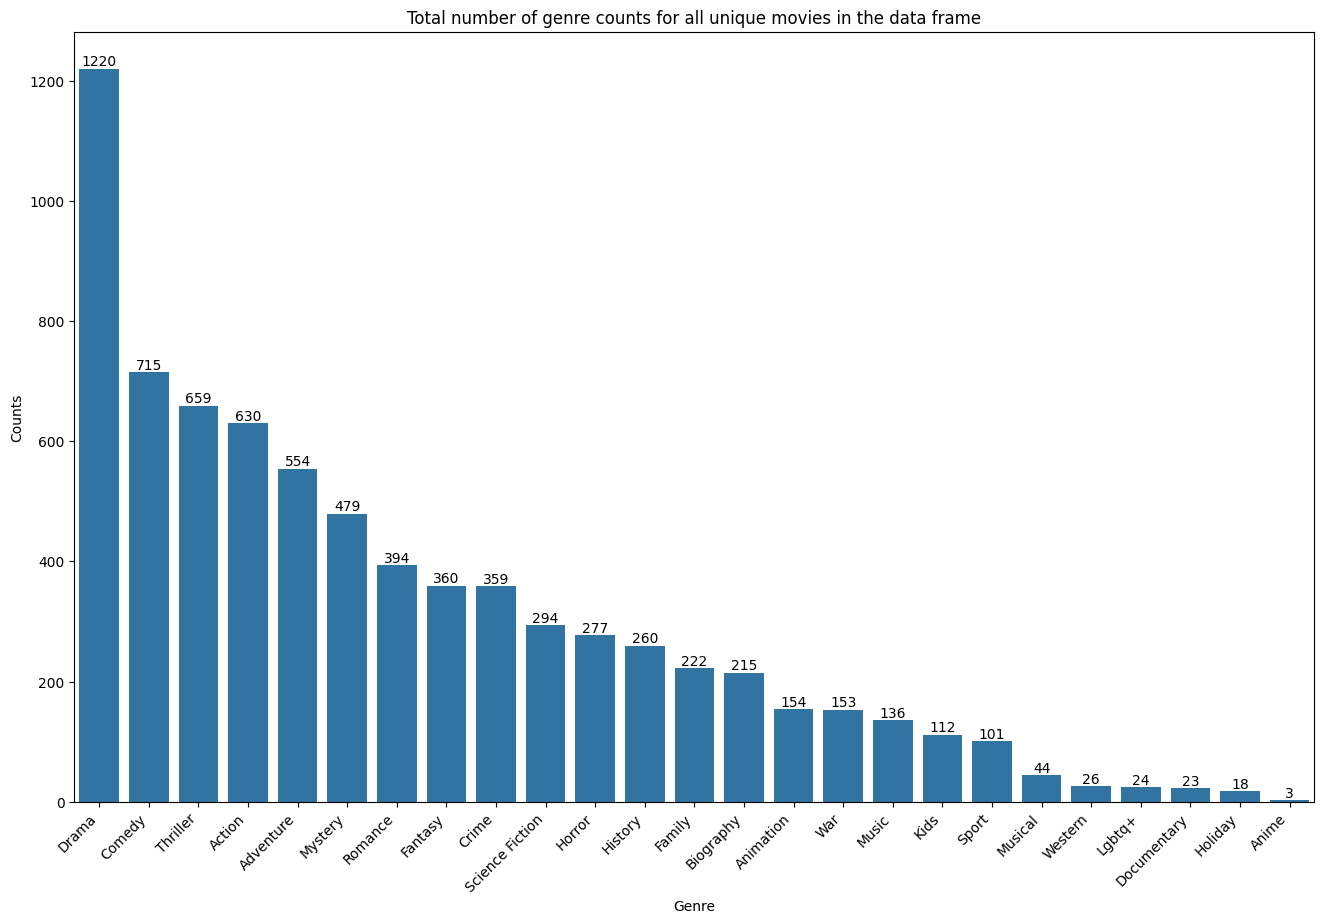

In [ ]:
unique_movies = []
for d in movieNreview['movie_title']:
  if d not in unique_movies:
    unique_movies.append(d)

genre_counts = {}

for movie_title in unique_movies:
    movie_row = movieNreview[movieNreview['movie_title'] == movie_title].iloc[0]
    genres = movie_row['movie_genre']

    for genre in genres:
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1

df_genre_counts = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Counts'])
df_genre_counts = df_genre_counts.sort_values(by='Counts', ascending=False)

plt.figure(figsize=(16, 10))
ax = sns.barplot(x='Genre', y='Counts', data=df_genre_counts)
ax.bar_label(ax.containers[0], fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Total number of genre counts for all unique movies in the data frame')
plt.show()

<ipython-input-35-6da44131b916>:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


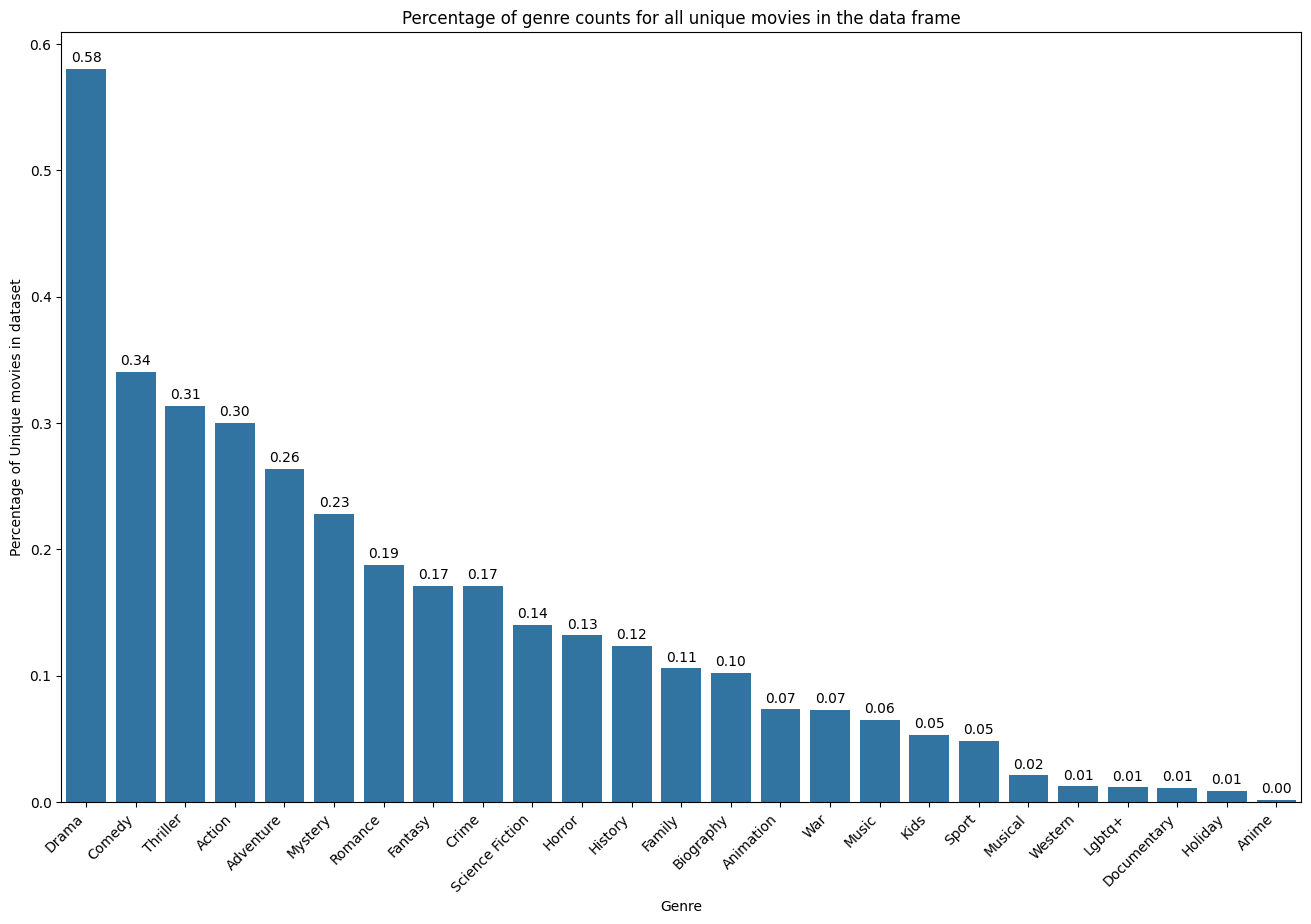

In [ ]:
genre_counts_percent = {genre: count / 2102 for genre, count in genre_counts.items()}

sorted_genre_counts_percent = dict(sorted(genre_counts_percent.items(), key=lambda item: item[1], reverse=True))

df_genre_counts = pd.DataFrame(list(sorted_genre_counts_percent.items()), columns=['Genre', 'Percentage of Unique movies in dataset'])

plt.figure(figsize=(16, 10))
ax = sns.barplot(x='Genre', y='Percentage of Unique movies in dataset', data=df_genre_counts)
ax.bar_label(ax.containers[0], fontsize=10, padding=3, fmt='%.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Percentage of genre counts for all unique movies in the data frame')
plt.show()

More than half of the uniques movies in the dataset has genre drama. Our model may become biased towards the "Drama" genre because of its overrepresentation. This might lead to recommendations that are overly focused on drama movies, which could affect the overall quality and diversity of recommendations as such it is a point we will take into consideration and see how we can mitigate.

In [ ]:
reviewer_review_counts = {}

for reviewer in movieNreview['reviewer_name']:
    if reviewer.lower() not in reviewer_review_counts:
        reviewer_review_counts[reviewer.lower()] = 1
    else:
        reviewer_review_counts[reviewer.lower()] += 1

reviewer_review_counts = dict(sorted(reviewer_review_counts.items(), key=lambda item: item[1], reverse=True))

In [ ]:
pd.Series(list(reviewer_review_counts.values())).describe()

,0
count,371202.000000
mean,2.151354
std,9.409785
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1074.000000


The most common number of reviews each reviewer leaves is 1.

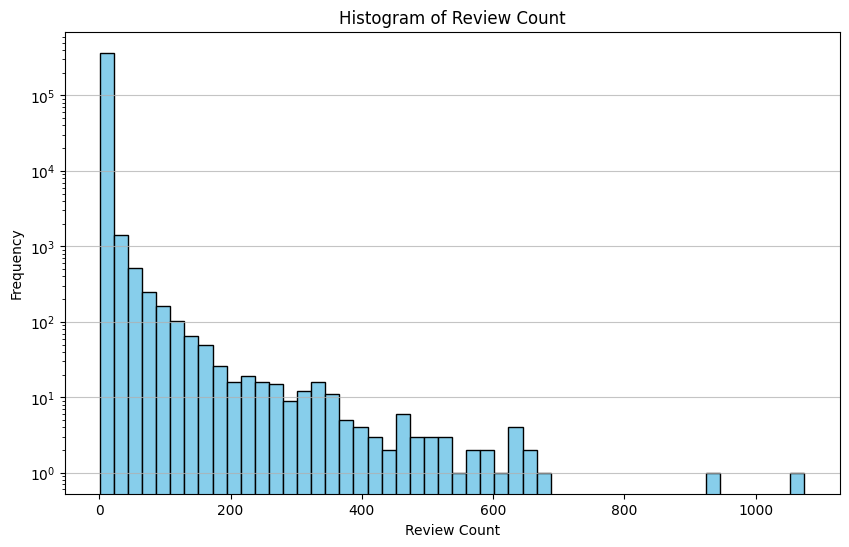

In [ ]:
reviews_series = pd.Series(list(reviewer_review_counts.values()))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(reviews_series, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Review Count')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()


As seen from the diagram, the bulk of the reviewers reviewed less than 20 movies and this is considered sparse considering we have over 2000 movies. To mitigate the cold start problem, we will try to use implicit feedback and models such as lightfm .

In [ ]:
# Calculate the length of each review
analysis_data = movieNreview.copy()
analysis_data['review_length'] = analysis_data['review_text'].apply(len)

# Get the minimum, maximum, and mean of the review lengths
min_length = analysis_data['review_length'].min()
max_length = analysis_data['review_length'].max()
mean_length = analysis_data['review_length'].mean()

print(f"Minimum review length: {min_length}")
print(f"Maximum review length: {max_length}")
print(f"Mean review length: {mean_length:.2f}")


Minimum review length: 4
Maximum review length: 16540
Mean review length: 1308.92


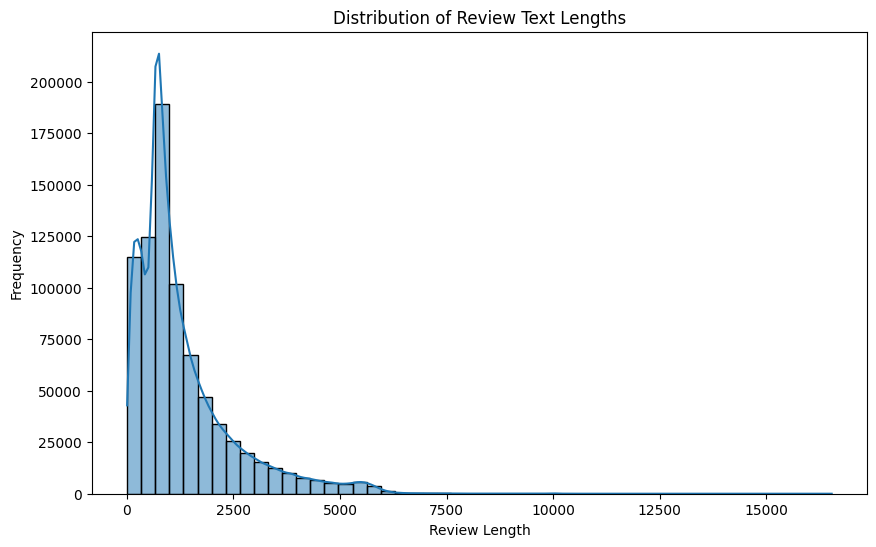

In [ ]:
# Plot the histogram of review lengths
plt.figure(figsize=(10,6))
sns.histplot(analysis_data['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Text Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()